In [2]:
library(haven)
library(ltm)

Warning message:
"package 'haven' was built under R version 4.1.3"
Loading required package: MASS

Loading required package: msm

Loading required package: polycor



In [3]:
setwd("C://Users//jihan//Downloads")
raw_data_location <- "Amigas_Latinas_SWLS(n=199).sav"
raw_data_file <- read_sav(raw_data_location)

In [4]:
num_items <- 5
raw_m <- as.matrix(raw_data_file[,2:6])

n_respondents <- nrow(raw_m)
raw_mprime <- as.matrix(t(raw_m))
mprime_m <-  raw_mprime %*% raw_m
product_moment_m <- mprime_m/n_respondents
raw_product_moment_matrix <- round(product_moment_m, digits = 4)
raw_product_moment_matrix [upper.tri(raw_product_moment_matrix)] <- NA
raw_product_moment_matrix

,happy1,happy2,happy3,happy4,happy5
happy1,0.4874,NA,NA,NA,NA
happy2,0.4221,0.5075,NA,NA,NA
happy3,0.4271,0.4523,0.6080,NA,NA
happy4,0.4372,0.4623,0.5578,0.6784,NA
happy5,0.3216,0.3367,0.3920,0.4171,0.4724


In [5]:
#- Model 1: Unidimensional model
mod1 <- sirt::noharm.sirt(pm=product_moment_m, N=n_respondents, dimensions=1)
options(digits=6)
mod1$tanaka
mod1$rmsr
options(digits=2)
mod1$residuals

[1] 0.999074

[1] 0.0129999

,happy1,happy2,happy3,happy4,happy5
happy1,0.0000,0.0240,-0.0103,-0.014,-0.0071
happy2,0.0240,0.0000,-0.0087,-0.012,-0.0082
happy3,-0.0103,-0.0087,0.0000,0.017,0.0061
happy4,-0.0138,-0.0120,0.0175,0.000,0.0117
happy5,-0.0071,-0.0082,0.0061,0.012,0.0000


In [6]:
#- Model 2: Two-dimensional model
mod2 <- sirt::noharm.sirt(pm=product_moment_m, N=n_respondents, dimensions=2)
options(digits=6)
mod2$tanaka
mod2$rmsr
options(digits=2)
mod2$residuals

[1] 0.999999

[1] 0.000451193

,happy1,happy2,happy3,happy4,happy5
happy1,0.0e+00,6.6e-07,-4.6e-04,-1.4e-04,8.9e-04
happy2,6.6e-07,0.0e+00,4.5e-04,1.5e-04,-8.9e-04
happy3,-4.6e-04,4.5e-04,0.0e+00,-4.9e-05,2.4e-05
happy4,-1.4e-04,1.5e-04,-4.9e-05,0.0e+00,5.8e-05
happy5,8.9e-04,-8.9e-04,2.4e-05,5.8e-05,0.0e+00


In [7]:
# Rasch Model
dat <- raw_m
res_Rasch_model<-rasch(dat)
summary(res_Rasch_model)
item.fit(res_Rasch_model,simulate.p.value=T)


Call:
rasch(data = dat)

Model Summary:
 log.Lik  AIC  BIC
    -521 1053 1073

Coefficients:
               value std.err z.vals
Dffclt.happy1  0.056    0.11  0.524
Dffclt.happy2 -0.003    0.11 -0.027
Dffclt.happy3 -0.307    0.11 -2.779
Dffclt.happy4 -0.536    0.12 -4.650
Dffclt.happy5  0.101    0.11  0.934
Dscrmn         2.779    0.27 10.169

Integration:
method: Gauss-Hermite
quadrature points: 21 

Optimization:
Convergence: 0 
max(|grad|): 0.0011 
quasi-Newton: BFGS 




Item-Fit Statistics and P-values

Call:
rasch(data = dat)

Alternative: Items do not fit the model
Ability Categories: 10
Monte Carlo samples: 100 

        X^2 Pr(>X^2)
happy1  7.7   0.5842
happy2 16.3   0.0594
happy3  6.6   0.3168
happy4  3.2   0.7624
happy5 17.8   0.0297



In [8]:
# 2PL model
res_2PL_model <- ltm(dat~z1)
summary(res_2PL_model)
item.fit(res_2PL_model,simulate.p.value=T)


Call:
ltm(formula = dat ~ z1)

Model Summary:
 log.Lik  AIC  BIC
    -511 1042 1075

Coefficients:
               value std.err z.vals
Dffclt.happy1  0.062    0.11  0.571
Dffclt.happy2  0.007    0.10  0.071
Dffclt.happy3 -0.279    0.11 -2.468
Dffclt.happy4 -0.526    0.12 -4.362
Dffclt.happy5  0.125    0.14  0.883
Dscrmn.happy1  3.364    0.78  4.287
Dscrmn.happy2  4.308    1.24  3.469
Dscrmn.happy3  3.709    0.90  4.102
Dscrmn.happy4  2.866    0.62  4.647
Dscrmn.happy5  1.453    0.29  5.085

Integration:
method: Gauss-Hermite
quadrature points: 21 

Optimization:
Convergence: 0 
max(|grad|): 0.0058 
quasi-Newton: BFGS 



Item-Fit Statistics and P-values

Call:
ltm(formula = dat ~ z1)

Alternative: Items do not fit the model
Ability Categories: 10
Monte Carlo samples: 100 

       X^2 Pr(>X^2)
happy1  32   0.2475
happy2  17   0.4653
happy3  22   0.4554
happy4  13   0.7921
happy5  51   0.1386



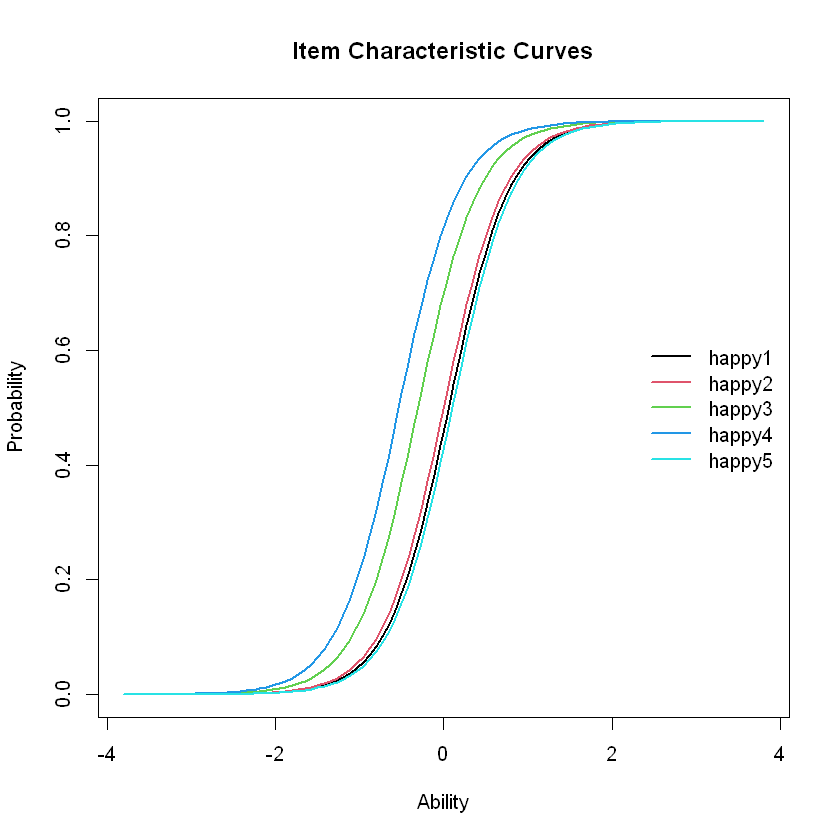

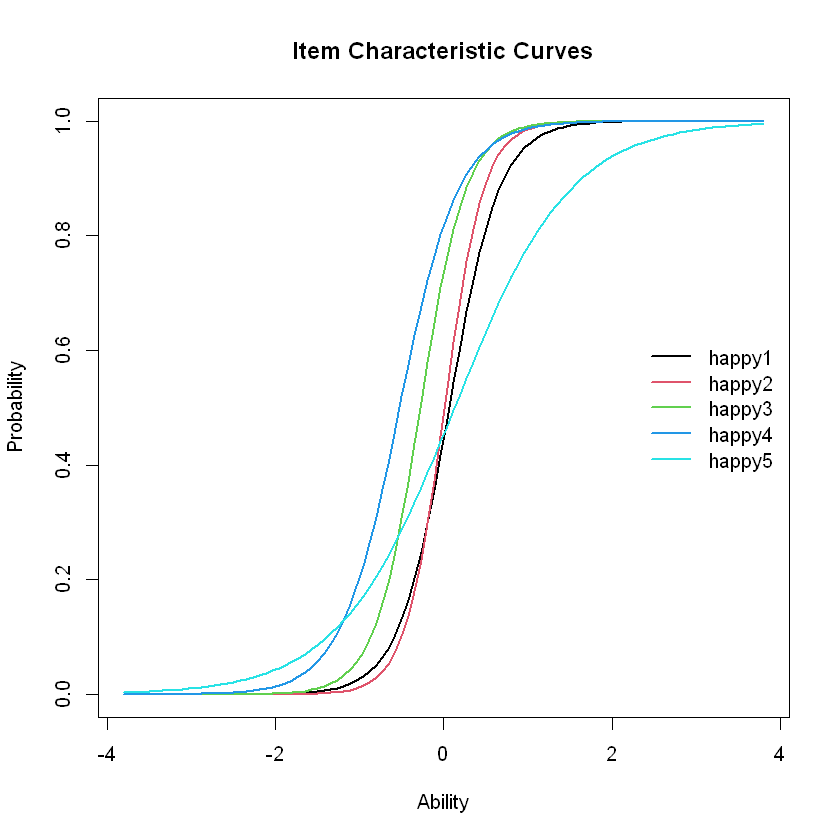

In [9]:
plot(res_Rasch_model, items = c(1, 2, 3, 4, 5), lwd = 2, legend = TRUE, cx = "right")
plot(res_2PL_model, items = c(1, 2, 3, 4, 5), lwd = 2, legend = TRUE, cx = "right")

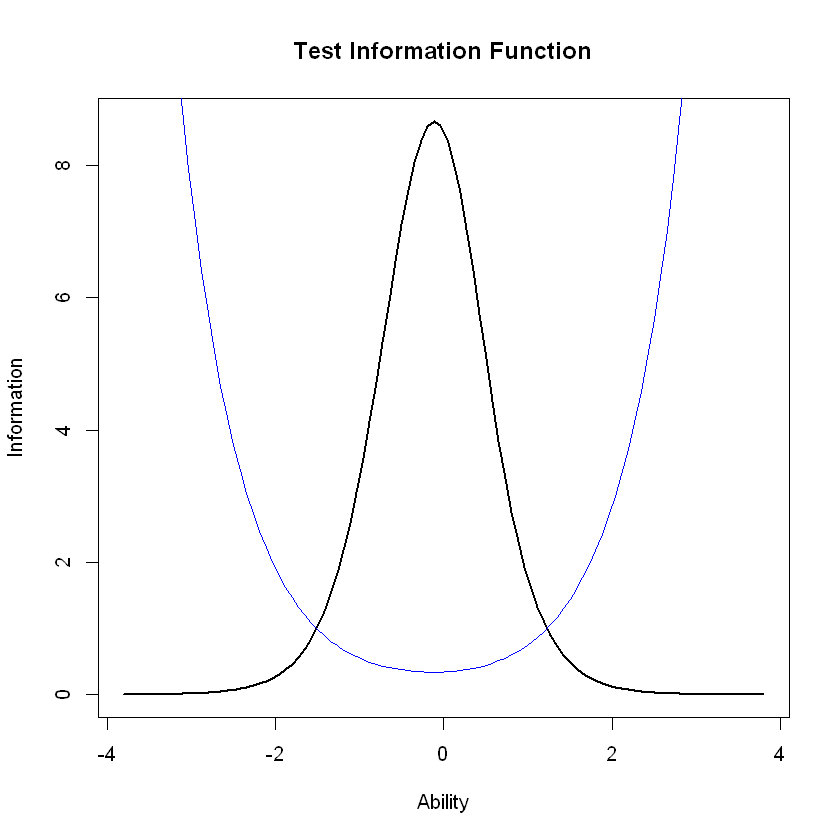

In [18]:
plot(res_Rasch_model, type = "IIC", items = 0, lwd = 2)
vals <- plot(res_Rasch_model, type = "IIC", items = 0, plot = FALSE)
lines(vals[, "z"], 1 / sqrt(vals[, "info"]), type = "l", lwd = 0.3,col="blue",
xlab = "Ability", ylab = "Standard Error",
main = "Standard Error of Measurement")

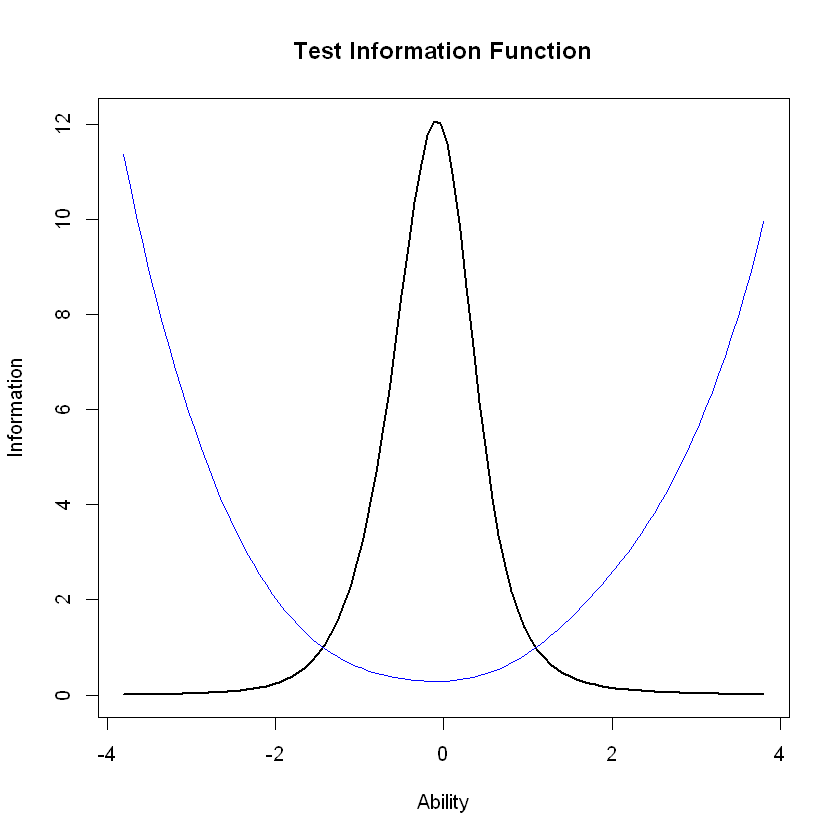

In [20]:
plot(res_2PL_model, type = "IIC", items = 0, lwd = 2)
vals <- plot(res_2PL_model, type = "IIC", items = 0, plot = FALSE)
lines(vals[, "z"], 1 / sqrt(vals[, "info"]), type = "l", lwd = 0.3,col="blue",
xlab = "Ability", ylab = "Standard Error",
main = "Standard Error of Measurement")

In [101]:
rel.ltm <- function(x) {
    eap <- ltm::factor.scores(x, method="EAP")$score.dat
    e <- sum(eap$Obs*eap$se.z1^2)/sum(eap$Obs)
    s <- sum(eap$Obs*eap$z1^2)/sum(eap$Obs)
    1-(e/(s+e))
}
rel.ltm(res_Rasch_model)
rel.ltm(res_2PL_model)

[1] 0.76

[1] 0.76